#Emotion Recognition Binary Classifier(Happy or Not Happy) using Fer-2013 Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/senior-project/CNNs/

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [ ]:
!pip install opencv-python matplotlib

In [5]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data',image_size=(48, 48),color_mode='grayscale')

Found 8896 files belonging to 2 classes.


###Scale Data

In [7]:
data = data.map(lambda x,y: (x/255, y))

###Split Data

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

###Build Model

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(48,48,1)))#build model
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(48, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

###Train Model

In [14]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
194/194 [==============================] - 782s 4s/step - loss: 0.6905 - accuracy: 0.5345 - val_loss: 0.6819 - val_accuracy: 0.5625
Epoch 2/20
194/194 [==============================] - 14s 72ms/step - loss: 0.6475 - accuracy: 0.6293 - val_loss: 0.5953 - val_accuracy: 0.6744
Epoch 3/20
194/194 [==============================] - 17s 88ms/step - loss: 0.5733 - accuracy: 0.7047 - val_loss: 0.5598 - val_accuracy: 0.7125
Epoch 4/20
194/194 [==============================] - 14s 74ms/step - loss: 0.5330 - accuracy: 0.7328 - val_loss: 0.5246 - val_accuracy: 0.7506
Epoch 5/20
194/194 [==============================] - 14s 72ms/step - loss: 0.5078 - accuracy: 0.7535 - val_loss: 0.5047 - val_accuracy: 0.7614
Epoch 6/20
194/194 [==============================] - 17s 89ms/step - loss: 0.4775 - accuracy: 0.7692 - val_loss: 0.4782 - val_accuracy: 0.7756
Epoch 7/20
194/194 [==============================] - 15s 75ms/step - loss: 0.4610 - accuracy: 0.7796 - val_loss: 0.4843 - val_accuracy: 

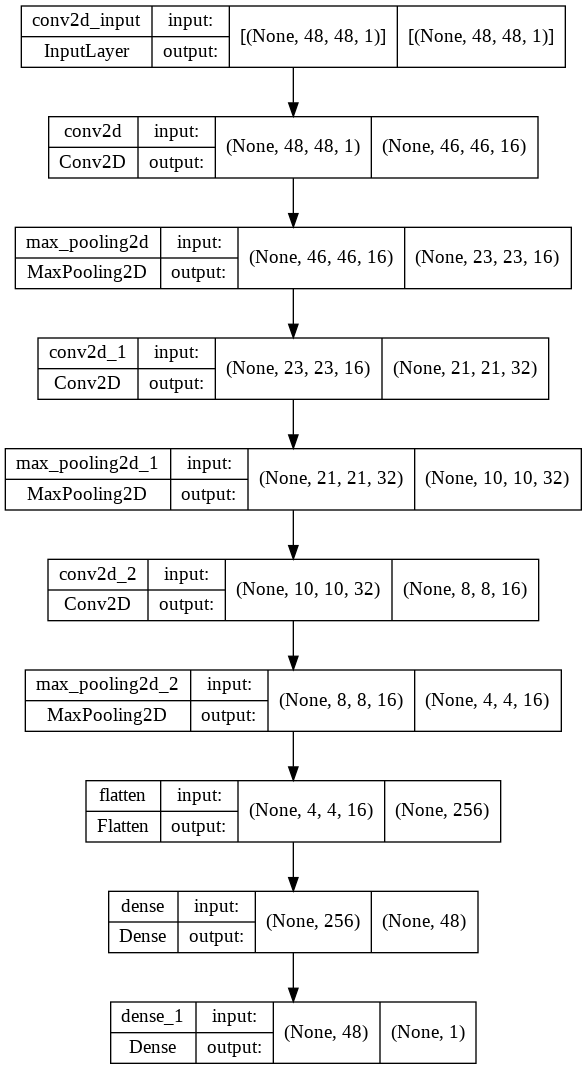

In [15]:
img_file = './model_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

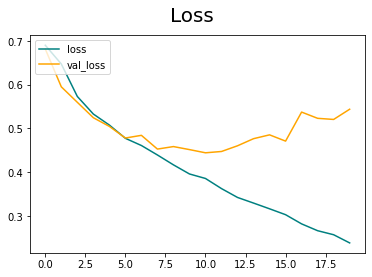

In [16]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

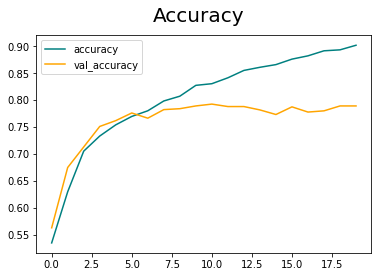

In [17]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [18]:
model.save('binary_emotion.h5')